<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/DL/8.%20Seq2Seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Seq2Seq

##Введение в Seq2Seq и Encoder

Модель **Seq2Seq** (Sequence-to-Sequence) представляет собой архитектуру нейронных сетей, которая предназначена для обработки последовательностей данных. Она состоит из двух основных компонентов: **Encoder** и **Decoder**. В этой статье мы сосредоточимся на первом компоненте — **Encoder**, который отвечает за преобразование входной последовательности в фиксированный контекстный вектор.

#### Основная цель Encoder'а
Основная задача **Encoder'а** заключается в том, чтобы преобразовать входную последовательность (например, предложение или последовательность символов) в некоторое внутреннее представление, которое можно использовать для дальнейшей обработки. Это внутреннее представление часто называют **контекстным вектором** или **скрытым состоянием**.

### Архитектура Encoder'а

Типичный **Encoder** основан на рекуррентной нейронной сети (RNN), либо её модификациях, таких как LSTM (Long Short-Term Memory) или GRU (Gated Recurrent Unit). Эти модели специально разработаны для работы с последовательностями данных, где текущий элемент зависит от предыдущих.

#### 1. Входные данные
Пусть у нас есть входная последовательность $\mathbf{x} = [x_1, x_2, \dots, x_T]$, где каждый элемент $x_t$ является словом или символом, представленным в виде вектора признаков (например, эмбеддинга). Длина последовательности равна $T$.

#### 2. Преобразование входных данных
Каждый элемент $x_t$ подается на вход RNN/LSTM/GRU по очереди. На каждом временном шаге $t$, модель вычисляет новое скрытое состояние $h_t$, которое зависит как от текущего входного элемента $x_t$, так и от предыдущего скрытого состояния $h_{t-1}$.

Формально, процесс вычисления скрытого состояния на шаге $t$ можно записать следующим образом:

$$
h_t = f(h_{t-1}, x_t)
$$

где $f$ — это функция перехода, определяемая архитектурой RNN/LSTM/GRU.

##### Пример для простой RNN:
Для простой рекуррентной нейронной сети функция перехода имеет вид:

$$
h_t = \tanh(W_h h_{t-1} + W_x x_t + b_h)
$$

где $W_h$ и $W_x$ — матрицы весов, $b_h$ — смещение (bias), а $\tanh$ — нелинейная функция активации.

##### Пример для LSTM:
Для LSTM функция перехода более сложная и включает дополнительные параметры, такие как "входные ворота" ($i_t$), "забывающие ворота" ($f_t$) и "выходные ворота" ($o_t$):

$$
i_t = \sigma(W_i [h_{t-1}, x_t] + b_i)
$$
$$
f_t = \sigma(W_f [h_{t-1}, x_t] + b_f)
$$
$$
o_t = \sigma(W_o [h_{t-1}, x_t] + b_o)
$$
$$
\tilde{c}_t = \tanh(W_c [h_{t-1}, x_t] + b_c)
$$
$$
c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t
$$
$$
h_t = o_t \odot \tanh(c_t)
$$

Здесь $\sigma$ — сигмоидная функция активации, $\odot$ — поэлементное произведение, а $c_t$ — ячейка памяти LSTM.

### Контекстный вектор

После того как все элементы входной последовательности были обработаны, последнее скрытое состояние $h_T$ (или ячейка памяти $c_T$ для LSTM) используется как **контекстный вектор**. Этот вектор содержит информацию о всей входной последовательности и передается дальше в **Decoder**, который использует его для генерации выходной последовательности.

В некоторых случаях вместо использования только последнего скрытого состояния $h_T$ применяется метод усреднения всех скрытых состояний $h_1, h_2, \dots, h_T$:

$$
\mathbf{c} = \frac{1}{T} \sum_{t=1}^T h_t
$$

Этот подход позволяет получить более репрезентативное представление всей последовательности.

### Математическое объяснение процесса кодирования

Рассмотрим подробно, как работает кодирование для простой RNN:

1. **Инициализация**: Скрытые состояния инициализируются начальным значением $h_0$, обычно это нулевой вектор.
   
$$
   h_0 = \mathbf{0}
$$

2. **Вычисление скрытых состояний**:
   Для каждого временного шага $t$ выполняется следующее:

$$
   h_t = \tanh(W_h h_{t-1} + W_x x_t + b_h)
$$

   Здесь $W_h$ и $W_x$ — матрицы весов, которые обучаемы, $b_h$ — смещение. Функция $\tanh$ обеспечивает нелинейность, что позволяет модели запоминать более сложные зависимости между элементами последовательности.

3. **Контекстный вектор**:
   После завершения обработки всех элементов последовательности, последнее скрытое состояние $h_T$ используется как контекстный вектор:

$$
   \mathbf{c} = h_T
$$



Таким образом, **Encoder** в модели **Seq2Seq** играет ключевую роль в преобразовании входной последовательности в фиксированное представление, которое затем используется **Decoder'ом** для генерации выходной последовательности. Основной принцип работы Encoder'а заключается в использовании рекуррентных структур (RNN, LSTM, GRU) для обработки последовательности и вычисления скрытых состояний, которые содержат информацию о всей последовательности.

Эта информация затем передается в **Decoder**, который будет рассмотрен в следующей части.





## Введение в Decoder Seq2Seq

**Decoder** — это второй компонент модели **Seq2Seq**, который отвечает за генерацию выходной последовательности на основе контекстного вектора, полученного от **Encoder'а**. Как и Encoder, Decoder также обычно основан на рекуррентных нейронных сетях (RNN), LSTM или GRU.

#### Основная цель Decoder'а
Основная задача **Decoder'а** заключается в том, чтобы преобразовать контекстный вектор (или скрытое состояние) из **Encoder'а** в выходную последовательность. Эта последовательность может быть, например, переводом исходного предложения, ответом на вопрос или продолжением текста.

### Архитектура Decoder'а

Для простоты объяснения будем рассматривать Decoder на основе RNN, но все описанные принципы применимы и к более сложным архитектурам, таким как LSTM и GRU.

#### 1. Входные данные
Пусть у нас есть входная последовательность $\mathbf{x} = [x_1, x_2, \dots, x_T]$, которая была обработана **Encoder'ом** и преобразована в контекстный вектор $\mathbf{c}$. Теперь наша задача — сгенерировать выходную последовательность $\mathbf{y} = [y_1, y_2, \dots, y_{T'}]$, где $T'$ — длина выходной последовательности.

#### 2. Инициализация Decoder'а
Перед началом работы **Decoder'а**, его начальное скрытое состояние $s_0$ инициализируется контекстным вектором $\mathbf{c}$:

$$
s_0 = \mathbf{c}
$$

В некоторых моделях используется комбинация контекстного вектора и начального скрытого состояния:

$$
s_0 = \tanh(W_s [\mathbf{c}, h_0])
$$

где $W_s$ — обучаемая матрица весов, а $h_0$ — начальное скрытое состояние, которое может быть нулевым вектором.

#### 3. Генерация выходной последовательности
На каждом временном шаге $t$, **Decoder** принимает текущее скрытое состояние $s_{t-1}$ и предыдущий выходной символ $y_{t-1}$ (на первом шаге это может быть специальный токен `<start>`), и вычисляет новое скрытое состояние $s_t$ и вероятности для всех возможных следующих символов.

Формально, процесс можно записать следующим образом:

$$
s_t = f(s_{t-1}, y_{t-1})
$$

где $f$ — функция перехода, определяемая архитектурой RNN/LSTM/GRU.

##### Пример для простой RNN:
Для простой рекуррентной нейронной сети функция перехода имеет вид:

$$
s_t = \tanh(W_s s_{t-1} + W_y y_{t-1} + b_s)
$$

где $W_s$ и $W_y$ — матрицы весов, $b_s$ — смещение (bias).

##### Пример для LSTM:
Для LSTM функция перехода более сложная и включает дополнительные параметры, такие как "входные ворота" ($i_t$), "забывающие ворота" ($f_t$) и "выходные ворота" ($o_t$):

$$
i_t = \sigma(W_i [s_{t-1}, y_{t-1}] + b_i)
$$
$$
f_t = \sigma(W_f [s_{t-1}, y_{t-1}] + b_f)
$$
$$
o_t = \sigma(W_o [s_{t-1}, y_{t-1}] + b_o)
$$
$$
\tilde{c}_t = \tanh(W_c [s_{t-1}, y_{t-1}] + b_c)
$$
$$
c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t
$$
$$
s_t = o_t \odot \tanh(c_t)
$$

Здесь $\sigma$ — сигмоидная функция активации, $\odot$ — поэлементное произведение, а $c_t$ — ячейка памяти LSTM.

#### 4. Вычисление вероятностей выходных символов
После того как новое скрытое состояние $s_t$ было вычислено, **Decoder** использует его для вычисления вероятностей всех возможных следующих символов. Обычно это делается с помощью линейного слоя и softmax функции:

$$
\hat{y}_t = \text{softmax}(W_o s_t + b_o)
$$

где $W_o$ — матрица весов, $b_o$ — смещение, а $\hat{y}_t$ — вектор вероятностей для всех возможных символов.

#### 5. Выбор следующего символа
На каждом временном шаге выбирается следующий символ $y_t$ либо как наиболее вероятный символ (greedy search):

$$
y_t = \arg\max(\hat{y}_t)
$$

либо с использованием других стратегий выбора, таких как beam search или sampling.

### Улучшенные методы: Attention Mechanism

Одним из важных улучшений модели **Seq2Seq** является механизм внимания (**Attention Mechanism**). Он позволяет Decoder'у не только использовать фиксированный контекстный вектор, но и обращаться к различным частям входной последовательности на каждом временном шаге.

#### Механизм внимания
Механизм внимания добавляет дополнительный шаг к работе **Decoder'а**, позволяющий ему "смотреть" на различные части входной последовательности при генерации каждого нового символа.

1. **Вычисление весов внимания**: Для каждого временного шага $t$ **Decoder** вычисляет веса внимания $\alpha_{t,i}$ для каждой позиции $i$ входной последовательности:

$$
   e_{t,i} = v^T \tanh(W_h h_i + W_s s_{t-1} + b_a)
$$
   
$$
   \alpha_{t,i} = \frac{\exp(e_{t,i})}{\sum_{j=1}^T \exp(e_{t,j})}
$$

   Здесь $h_i$ — скрытое состояние **Encoder'а** на позиции $i$, $s_{t-1}$ — скрытое состояние **Decoder'а** на предыдущем шаге, а $v$, $W_h$, $W_s$ и $b_a$ — обучаемые параметры.

2. **Вычисление контекстного вектора**: На основе весов внимания вычисляется новый контекстный вектор $\mathbf{c}_t$:

$$
   \mathbf{c}_t = \sum_{i=1}^T \alpha_{t,i} h_i
$$

3. **Объединение контекстного вектора с текущим скрытым состоянием**: Контекстный вектор $\mathbf{c}_t$ объединяется с текущим скрытым состоянием $s_{t-1}$ для вычисления нового скрытого состояния $s_t$:

$$
   s_t = f(s_{t-1}, y_{t-1}, \mathbf{c}_t)
$$

4. **Вычисление вероятностей выходных символов**: Аналогично базовой модели, вычисляются вероятности для всех возможных символов:

$$
   \hat{y}_t = \text{softmax}(W_o [s_t, \mathbf{c}_t] + b_o)
$$



Таким образом, **Decoder** в модели **Seq2Seq** играет ключевую роль в генерации выходной последовательности на основе контекстного вектора, полученного от **Encoder'а**. Основной принцип работы Decoder'а заключается в использовании рекуррентных структур (RNN, LSTM, GRU) для пошаговой генерации символов и вычисления вероятностей для всех возможных следующих символов.

Использование механизма внимания значительно улучшает качество модели, позволяя Decoder'у "смотреть" на различные части входной последовательности при генерации каждого нового символа. Это особенно полезно для длинных и сложных последовательностей, где фиксированный контекстный вектор может не содержать всей необходимой информации.










##Конкретный числовой пример для Seq2Seq с Encoder и Decoder

Для простоты будем рассматривать модель на основе простых рекуррентных нейронных сетей (RNN) без механизма внимания. Предположим, что у нас есть входная последовательность $\mathbf{x} = [x_1, x_2]$ и мы хотим сгенерировать выходную последовательность $\mathbf{y} = [y_1, y_2]$.

#### Входные данные
Пусть наша входная последовательность состоит из двух элементов: $x_1 = 1$ и $x_2 = 2$. Эти элементы представлены в виде эмбеддингов:

$$
x_1 = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix}, \quad x_2 = \begin{bmatrix} 0.3 \\ 0.4 \end{bmatrix}
$$

#### Encoder

##### Инициализация скрытого состояния
Начальное скрытое состояние $h_0$ равно нулевому вектору:

$$
h_0 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$

##### Вычисление скрытых состояний
Для простой RNN функция перехода имеет вид:

$$
h_t = \tanh(W_h h_{t-1} + W_x x_t + b_h)
$$

Предположим, что матрицы весов и смещения имеют следующие значения:

$$
W_h = \begin{bmatrix} 0.5 & 0.1 \\ 0.2 & 0.6 \end{bmatrix}, \quad W_x = \begin{bmatrix} 0.3 & 0.4 \\ 0.1 & 0.2 \end{bmatrix}, \quad b_h = \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix}
$$

**Шаг 1 (t=1):**

$$
h_1 = \tanh \left( W_h h_0 + W_x x_1 + b_h \right)
$$

Подставляем значения:

$$
h_1 = \tanh \left( \begin{bmatrix} 0.5 & 0.1 \\ 0.2 & 0.6 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.3 & 0.4 \\ 0.1 & 0.2 \end{bmatrix} \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right)
$$

Вычисляем произведение матриц:

$$
\begin{bmatrix} 0.3 & 0.4 \\ 0.1 & 0.2 \end{bmatrix} \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} = \begin{bmatrix} 0.3 \cdot 0.1 + 0.4 \cdot 0.2 \\ 0.1 \cdot 0.1 + 0.2 \cdot 0.2 \end{bmatrix} = \begin{bmatrix} 0.11 \\ 0.05 \end{bmatrix}
$$

Теперь добавляем смещение:

$$
h_1 = \tanh \left( \begin{bmatrix} 0.11 \\ 0.05 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right) = \tanh \left( \begin{bmatrix} 0.21 \\ 0.15 \end{bmatrix} \right)
$$

Применяем функцию активации $\tanh$:

$$
h_1 = \begin{bmatrix} \tanh(0.21) \\ \tanh(0.15) \end{bmatrix} \approx \begin{bmatrix} 0.207 \\ 0.149 \end{bmatrix}
$$

**Шаг 2 (t=2):**

$$
h_2 = \tanh \left( W_h h_1 + W_x x_2 + b_h \right)
$$

Подставляем значения:

$$
h_2 = \tanh \left( \begin{bmatrix} 0.5 & 0.1 \\ 0.2 & 0.6 \end{bmatrix} \begin{bmatrix} 0.207 \\ 0.149 \end{bmatrix} + \begin{bmatrix} 0.3 & 0.4 \\ 0.1 & 0.2 \end{bmatrix} \begin{bmatrix} 0.3 \\ 0.4 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right)
$$

Вычисляем произведение матриц:

$$
\begin{bmatrix} 0.5 & 0.1 \\ 0.2 & 0.6 \end{bmatrix} \begin{bmatrix} 0.207 \\ 0.149 \end{bmatrix} = \begin{bmatrix} 0.5 \cdot 0.207 + 0.1 \cdot 0.149 \\ 0.2 \cdot 0.207 + 0.6 \cdot 0.149 \end{bmatrix} = \begin{bmatrix} 0.1184 \\ 0.1314 \end{bmatrix}
$$

$$
\begin{bmatrix} 0.3 & 0.4 \\ 0.1 & 0.2 \end{bmatrix} \begin{bmatrix} 0.3 \\ 0.4 \end{bmatrix} = \begin{bmatrix} 0.3 \cdot 0.3 + 0.4 \cdot 0.4 \\ 0.1 \cdot 0.3 + 0.2 \cdot 0.4 \end{bmatrix} = \begin{bmatrix} 0.25 \\ 0.11 \end{bmatrix}
$$

Теперь добавляем смещение:

$$
h_2 = \tanh \left( \begin{bmatrix} 0.1184 \\ 0.1314 \end{bmatrix} + \begin{bmatrix} 0.25 \\ 0.11 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right) = \tanh \left( \begin{bmatrix} 0.4684 \\ 0.3414 \end{bmatrix} \right)
$$

Применяем функцию активации $\tanh$:

$$
h_2 = \begin{bmatrix} \tanh(0.4684) \\ \tanh(0.3414) \end{bmatrix} \approx \begin{bmatrix} 0.438 \\ 0.331 \end{bmatrix}
$$

Контекстный вектор $\mathbf{c}$ будет равен последнему скрытому состоянию $h_2$:

$$
\mathbf{c} = \begin{bmatrix} 0.438 \\ 0.331 \end{bmatrix}
$$

#### Decoder

##### Инициализация скрытого состояния
Начальное скрытое состояние $s_0$ инициализируется контекстным вектором $\mathbf{c}$:

$$
s_0 = \mathbf{c} = \begin{bmatrix} 0.438 \\ 0.331 \end{bmatrix}
$$

##### Вычисление скрытых состояний и вероятностей
Для простоты предположим, что у нас есть два возможных символа $y_1$ и $y_2$, которые могут быть сгенерированы на каждом шаге.

Матрицы весов и смещения для Decoder'а:

$$
W_s = \begin{bmatrix} 0.4 & 0.3 \\ 0.2 & 0.5 \end{bmatrix}, \quad W_y = \begin{bmatrix} 0.6 & 0.7 \\ 0.8 & 0.9 \end{bmatrix}, \quad b_s = \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix}
$$

Матрица весов для вычисления вероятностей:

$$
W_o = \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix}, \quad b_o = \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix}
$$

**Шаг 1 (t=1):**

На первом шаге используется специальный токен `<start>` с эмбеддингом $y_0 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$:

$$
s_1 = \tanh \left( W_s s_0 + W_y y_0 + b_s \right)
$$

Подставляем значения:

$$
s_1 = \tanh \left( \begin{bmatrix} 0.4 & 0.3 \\ 0.2 & 0.5 \end{bmatrix} \begin{bmatrix} 0.438 \\ 0.331 \end{bmatrix} + \begin{bmatrix} 0.6 & 0.7 \\ 0.8 & 0.9 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right)
$$

Вычисляем произведение матриц:

$$
\begin{bmatrix} 0.4 & 0.3 \\ 0.2 & 0.5 \end{bmatrix} \begin{bmatrix} 0.438 \\ 0.331 \end{bmatrix} = \begin{bmatrix} 0.4 \cdot 0.438 + 0.3 \cdot 0.331 \\ 0.2 \cdot 0.438 + 0.5 \cdot 0.331 \end{bmatrix} = \begin{bmatrix} 0.2829 \\ 0.2481 \end{bmatrix}
$$

Теперь добавляем смещение:

$$
s_1 = \tanh \left( \begin{bmatrix} 0.2829 \\ 0.2481 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right) = \tanh \left( \begin{bmatrix} 0.3829 \\ 0.3481 \end{bmatrix} \right)
$$

Применяем функцию активации $\tanh$:

$$
s_1 = \begin{bmatrix} \tanh(0.3829) \\ \tanh(0.3481) \end{bmatrix} \approx \begin{bmatrix} 0.365 \\ 0.335 \end{bmatrix}
$$

Вычисляем вероятности для всех возможных символов:

$$
\hat{y}_1 = \text{softmax} \left( W_o s_1 + b_o \right)
$$

Подставляем значения:

$$
\hat{y}_1 = \text{softmax} \left( \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \begin{bmatrix} 0.365 \\ 0.335 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right)
$$

Вычисляем произведение матриц:

$$
\begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \begin{bmatrix} 0.365 \\ 0.335 \end{bmatrix} = \begin{bmatrix} 0.5 \cdot 0.365 + 0.6 \cdot 0.335 \\ 0.7 \cdot 0.365 + 0.8 \cdot 0.335 \end{bmatrix} = \begin{bmatrix} 0.3845 \\ 0.5015 \end{bmatrix}
$$

Теперь добавляем смещение:

$$
\hat{y}_1 = \text{softmax} \left( \begin{bmatrix} 0.3845 \\ 0.5015 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right) = \text{softmax} \left( \begin{bmatrix} 0.4845 \\ 0.6015 \end{bmatrix} \right)
$$

Применяем функцию softmax:

$$
\hat{y}_1 = \begin{bmatrix} \frac{\exp(0.4845)}{\exp(0.4845) + \exp(0.6015)} \\ \frac{\exp(0.6015)}{\exp(0.4845) + \exp(0.6015)} \end{bmatrix} \approx \begin{bmatrix} 0.467 \\ 0.533 \end{bmatrix}
$$

Выбираем наиболее вероятный символ $y_1$:

$$
y_1 = \arg\max(\hat{y}_1) = 1
$$

**Шаг 2 (t=2):**

Теперь используем символ $y_1$ с эмбеддингом $y_1 = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix}$:

$$
s_2 = \tanh \left( W_s s_1 + W_y y_1 + b_s \right)
$$

Подставляем значения:

$$
s_2 = \tanh \left( \begin{bmatrix} 0.4 & 0.3 \\ 0.2 & 0.5 \end{bmatrix} \begin{bmatrix} 0.365 \\ 0.335 \end{bmatrix} + \begin{bmatrix} 0.6 & 0.7 \\ 0.8 & 0.9 \end{bmatrix} \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right)
$$

Вычисляем произведение матриц:

$$
\begin{bmatrix} 0.4 & 0.3 \\ 0.2 & 0.5 \end{bmatrix} \begin{bmatrix} 0.365 \\ 0.335 \end{bmatrix} = \begin{bmatrix} 0.2829 \\ 0.2481 \end{bmatrix}
$$

$$
\begin{bmatrix} 0.6 & 0.7 \\ 0.8 & 0.9 \end{bmatrix} \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} = \begin{bmatrix} 0.6 \cdot 0.1 + 0.7 \cdot 0.2 \\ 0.8 \cdot 0.1 + 0.9 \cdot 0.2 \end{bmatrix} = \begin{bmatrix} 0.2 \\ 0.26 \end{bmatrix}
$$

Теперь добавляем смещение:

$$
s_2 = \tanh \left( \begin{bmatrix} 0.2829 \\ 0.2481 \end{bmatrix} + \begin{bmatrix} 0.2 \\ 0.26 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right) = \tanh \left( \begin{bmatrix} 0.5829 \\ 0.6081 \end{bmatrix} \right)
$$

Применяем функцию активации $\tanh$:

$$
s_2 = \begin{bmatrix} \tanh(0.5829) \\ \tanh(0.6081) \end{bmatrix} \approx \begin{bmatrix} 0.524 \\ 0.542 \end{bmatrix}
$$

Вычисляем вероятности для всех возможных символов:

$$
\hat{y}_2 = \text{softmax} \left( W_o s_2 + b_o \right)
$$

Подставляем значения:

$$
\hat{y}_2 = \text{softmax} \left( \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \begin{bmatrix} 0.524 \\ 0.542 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right)
$$

Вычисляем произведение матриц:

$$
\begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \begin{bmatrix} 0.524 \\ 0.542 \end{bmatrix} = \begin{bmatrix} 0.5 \cdot 0.524 + 0.6 \cdot 0.542 \\ 0.7 \cdot 0.524 + 0.8 \cdot 0.542 \end{bmatrix} = \begin{bmatrix} 0.5732 \\ 0.8044 \end{bmatrix}
$$

Теперь добавляем смещение:

$$
\hat{y}_2 = \text{softmax} \left( \begin{bmatrix} 0.5732 \\ 0.8044 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right) = \text{softmax} \left( \begin{bmatrix} 0.6732 \\ 0.9044 \end{bmatrix} \right)
$$

Применяем функцию softmax:

$$
\hat{y}_2 = \begin{bmatrix} \frac{\exp(0.6732)}{\exp(0.6732) + \exp(0.9044)} \\ \frac{\exp(0.9044)}{\exp(0.6732) + \exp(0.9044)} \end{bmatrix} \approx \begin{bmatrix} 0.356 \\ 0.644 \end{bmatrix}
$$

Выбираем наиболее вероятный символ $y_2$:

$$
y_2 = \arg\max(\hat{y}_2) = 1
$$

Таким образом, в данном числовом примере мы показали, как работает **Encoder** и **Decoder** в модели **Seq2Seq**. Мы рассмотрели процесс кодирования входной последовательности в контекстный вектор и использование этого вектора для генерации выходной последовательности. Хотя этот пример основан на простых RNN, принципы остаются такими же для более сложных архитектур, таких как LSTM и GRU.













##Механизм внимания в модели Seq2Seq

#### Введение

Механизм внимания (Attention Mechanism) является одной из ключевых концепций в современных моделях глубокого обучения, особенно в задачах обработки естественного языка (NLP), машинного перевода и других задачах, связанных с последовательностями. Он позволяет модели "смотреть" на различные части входной последовательности при генерации каждого нового символа, что значительно улучшает качество модели.

В этой лекции мы подробно рассмотрим основные принципы работы механизма внимания, его математическое описание и практические аспекты использования в модели **Seq2Seq**.

### 1. Основные принципы механизма внимания

#### Что такое внимание?

Механизм внимания можно рассматривать как способ "фокусировки" модели на определённых частях входной последовательности при генерации выходной последовательности. В отличие от базовой модели **Seq2Seq**, где используется только фиксированный контекстный вектор, механизм внимания позволяет Decoder'у обращаться к различным частям входной последовательности на каждом временном шаге.

#### Пример из жизни
Для лучшего понимания представьте себе процесс перевода текста. Когда человек переводит предложение, он не просто запоминает весь исходный текст и затем пытается воспроизвести его на другом языке. Вместо этого, он последовательно читает каждое слово или фразу, анализирует её контекст и переводит её по мере продвижения. Это похоже на то, как работает механизм внимания в нейронных сетях.


### 1.1. Проблема классических моделей Seq2Seq
В классических моделях Seq2Seq Encoder преобразует входную последовательность в фиксированный контекстный вектор $c$, который передается Decoder. Однако у этого подхода есть два основных недостатка:
1. **Потеря информации**: Фиксированный контекстный вектор может не сохранить всю информацию из длинных входных последовательностей.
2. **Неспособность фокусироваться на важных частях**: Decoder не может динамически выбирать, какие части входной последовательности наиболее важны для генерации текущего элемента выходной последовательности.


### 2. Математическое описание механизма внимания

Рассмотрим подробно, как работает механизм внимания в модели **Seq2Seq**.

#### Шаги механизма внимания

1. **Вычисление весов внимания**: Для каждого временного шага $t$ **Decoder** вычисляет веса внимания $\alpha_{t,i}$ для каждой позиции $i$ входной последовательности:

$$
   e_{t,i} = v^T \tanh(W_h h_i + W_s s_{t-1} + b_a)
$$

   Здесь:
   - $h_i$ — скрытое состояние **Encoder'а** на позиции $i$.
   - $s_{t-1}$ — скрытое состояние **Decoder'а** на предыдущем шаге.
   - $v$, $W_h$, $W_s$ и $b_a$ — обучаемые параметры.

   После вычисления всех $e_{t,i}$, веса внимания $\alpha_{t,i}$ нормализуются с помощью функции softmax:

$$
   \alpha_{t,i} = \frac{\exp(e_{t,i})}{\sum_{j=1}^T \exp(e_{t,j})}
$$

   Эти веса показывают, насколько важна каждая позиция входной последовательности для текущего шага декодирования.

2. **Вычисление контекстного вектора**: На основе весов внимания вычисляется новый контекстный вектор $\mathbf{c}_t$:

$$
   \mathbf{c}_t = \sum_{i=1}^T \alpha_{t,i} h_i
$$

   Этот вектор представляет собой взвешенную сумму всех скрытых состояний **Encoder'а**, где веса определяются механизмом внимания.

3. **Объединение контекстного вектора с текущим скрытым состоянием**: Контекстный вектор $\mathbf{c}_t$ объединяется с текущим скрытым состоянием $s_{t-1}$ для вычисления нового скрытого состояния $s_t$. Обычно это делается с использованием рекуррентной функции перехода, такой как RNN, LSTM или GRU:

$$
   s_t = f(s_{t-1}, y_{t-1}, \mathbf{c}_t)
$$

   Здесь $f$ — функция перехода, которая может быть определена следующим образом для простой RNN:

$$
   s_t = \tanh(W_s [s_{t-1}, y_{t-1}] + W_c \mathbf{c}_t + b_s)
$$

   Для более сложных архитектур, таких как LSTM или GRU, формулы будут несколько сложнее, но идея остается той же: контекстный вектор используется для модификации скрытого состояния.

4. **Вычисление вероятностей выходных символов**: Аналогично базовой модели, вычисляются вероятности для всех возможных символов:

$$
   \hat{y}_t = \text{softmax}(W_o [s_t, \mathbf{c}_t] + b_o)
$$

   Здесь $W_o$ и $b_o$ — обучаемые параметры, которые используются для преобразования скрытого состояния и контекстного вектора в вероятности для всех возможных выходных символов.

### 3. Типы механизмов внимания

Существует несколько различных типов механизмов внимания, каждый из которых имеет свои особенности и области применения.

#### a. **Additive Attention (Bahdanau Attention)**

Этот тип внимания был предложен в статье Bahdanau et al. (2014) и использует аддитивную комбинацию скрытых состояний **Encoder'а** и **Decoder'а** для вычисления весов внимания:

$$
e_{t,i} = v^T \tanh(W_h h_i + W_s s_{t-1} + b_a)
$$

Здесь $v$, $W_h$, $W_s$ и $b_a$ — обучаемые параметры. Преимущество этого подхода заключается в том, что он позволяет модели учиться комбинировать информацию из разных источников (скрытых состояний **Encoder'а** и **Decoder'а**) для вычисления весов внимания.

#### b. **Dot-Product Attention (Luong Attention)**

Этот тип внимания был предложен в статье Luong et al. (2015) и использует скалярное произведение между скрытыми состояниями **Encoder'а** и **Decoder'а** для вычисления весов внимания:

$$
e_{t,i} = s_{t-1}^T h_i
$$

Этот подход проще и быстрее, чем аддитивное внимание, поскольку не требует дополнительных параметров. Однако он может быть менее эффективным для длинных последовательностей, поскольку скалярное произведение может привести к большим значениям, что затрудняет стабильное обучение модели.

#### c. **Scaled Dot-Product Attention**

Этот тип внимания был предложен в статье Vaswani et al. (2017) и является основой для модели Transformer. Он использует скалярное произведение между скрытыми состояниями **Encoder'а** и **Decoder'а**, но масштабирует его на обратный квадратный корень от размерности скрытого состояния:

$$
e_{t,i} = \frac{s_{t-1}^T h_i}{\sqrt{d_k}}
$$

где $d_k$ — размерность скрытого состояния. Это масштабирование помогает стабилизировать обучение модели, особенно для длинных последовательностей.

### 4. Расширенные механизмы внимания

Помимо базовых типов внимания, существует множество расширенных механизмов внимания, которые позволяют модели учитывать дополнительные факторы и улучшать качество генерации.

#### a. **Multi-Head Attention**

Этот механизм был предложен в статье Vaswani et al. (2017) и используется в модели Transformer. Он позволяет модели вычислять несколько независимых наборов весов внимания, каждый из которых фокусируется на разных аспектах входной последовательности:

$$
\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \dots, \text{head}_h) W_O
$$

где $Q$, $K$ и $V$ — матрицы запросов, ключей и значений соответственно, а $W_O$ — обучаемая матрица весов. Каждый "голова" (head) вычисляет свой собственный набор весов внимания и контекстных векторов, что позволяет модели учитывать больше информации при генерации выходной последовательности.

#### b. **Self-Attention**

Этот механизм позволяет модели вычислять веса внимания между элементами одной и той же последовательности, что полезно для задач, таких как машинный перевод или генерация текста. В этом случае матрицы запросов, ключей и значений строятся из одной и той же последовательности:

$$
\text{SelfAttention}(X) = \text{Attention}(X, X, X)
$$

Этот механизм позволяет модели учитывать зависимости между всеми элементами последовательности, что значительно улучшает качество генерации.

### 5. Практическое применение механизма внимания

Механизм внимания широко используется в различных задачах обработки естественного языка, таких как машинный перевод, суммаризация текста, ответы на вопросы и многие другие. Он позволяет моделям учитывать контекст всей входной последовательности при генерации каждого нового символа, что значительно улучшает качество генерации.

#### a. **Машинный перевод**

В задаче машинного перевода механизм внимания позволяет модели учитывать зависимости между словами в исходном и целевом языках, что значительно улучшает качество перевода. Например, модель может использовать внимание для выравнивания слов в исходном и целевом языках, что позволяет ей лучше учитывать контекст и грамматические особенности обоих языков.

#### b. **Текстовая суммаризация**

В задаче текстовой суммаризации механизм внимания позволяет модели учитывать важность различных частей исходного текста при генерации резюме. Например, модель может использовать внимание для выделения наиболее важных предложений и фраз, которые должны быть включены в резюме.

#### c. **Ответы на вопросы**

В задаче ответов на вопросы механизм внимания позволяет модели учитывать контекст вопроса и документа, который содержит ответ. Например, модель может использовать внимание для выделения наиболее релевантных частей документа, которые содержат ответ на вопрос.

Таким образом, механизм внимания является одной из ключевых концепций в современных моделях глубокого обучения, особенно в задачах обработки естественного языка. Он позволяет моделям учитывать контекст всей входной последовательности при генерации каждого нового символа, что значительно улучшает качество генерации. В этой лекции мы рассмотрели основные принципы работы механизма внимания, его математическое описание и практические аспекты использования в модели **Seq2Seq**. Надеюсь, эта информация поможет вам лучше понять, как работает механизм внимания и как его можно использовать в своих проектах.






### Конкретный числовой пример для механизма внимания в модели Seq2Seq

Для лучшего понимания, давайте рассмотрим конкретный числовой пример работы механизма внимания в модели **Seq2Seq**. Мы будем использовать простую RNN с аддитивным механизмом внимания (Bahdanau Attention).

#### Входные данные
Пусть наша входная последовательность состоит из двух элементов: $x_1 = 1$ и $x_2 = 2$. Эти элементы представлены в виде эмбеддингов:

$$
x_1 = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix}, \quad x_2 = \begin{bmatrix} 0.3 \\ 0.4 \end{bmatrix}
$$

#### Encoder

##### Инициализация скрытого состояния
Начальное скрытое состояние $h_0$ равно нулевому вектору:

$$
h_0 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$

##### Вычисление скрытых состояний
Для простой RNN функция перехода имеет вид:

$$
h_t = \tanh(W_h h_{t-1} + W_x x_t + b_h)
$$

Предположим, что матрицы весов и смещения имеют следующие значения:

$$
W_h = \begin{bmatrix} 0.5 & 0.1 \\ 0.2 & 0.6 \end{bmatrix}, \quad W_x = \begin{bmatrix} 0.3 & 0.4 \\ 0.1 & 0.2 \end{bmatrix}, \quad b_h = \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix}
$$

**Шаг 1 (t=1):**

$$
h_1 = \tanh \left( W_h h_0 + W_x x_1 + b_h \right)
$$

Подставляем значения:

$$
h_1 = \tanh \left( \begin{bmatrix} 0.5 & 0.1 \\ 0.2 & 0.6 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.3 & 0.4 \\ 0.1 & 0.2 \end{bmatrix} \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right)
$$

Вычисляем произведение матриц:

$$
\begin{bmatrix} 0.3 & 0.4 \\ 0.1 & 0.2 \end{bmatrix} \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} = \begin{bmatrix} 0.11 \\ 0.05 \end{bmatrix}
$$

Теперь добавляем смещение:

$$
h_1 = \tanh \left( \begin{bmatrix} 0.11 \\ 0.05 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right) = \tanh \left( \begin{bmatrix} 0.21 \\ 0.15 \end{bmatrix} \right)
$$

Применяем функцию активации $\tanh$:

$$
h_1 = \begin{bmatrix} \tanh(0.21) \\ \tanh(0.15) \end{bmatrix} \approx \begin{bmatrix} 0.207 \\ 0.149 \end{bmatrix}
$$

**Шаг 2 (t=2):**

$$
h_2 = \tanh \left( W_h h_1 + W_x x_2 + b_h \right)
$$

Подставляем значения:

$$
h_2 = \tanh \left( \begin{bmatrix} 0.5 & 0.1 \\ 0.2 & 0.6 \end{bmatrix} \begin{bmatrix} 0.207 \\ 0.149 \end{bmatrix} + \begin{bmatrix} 0.3 & 0.4 \\ 0.1 & 0.2 \end{bmatrix} \begin{bmatrix} 0.3 \\ 0.4 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right)
$$

Вычисляем произведение матриц:

$$
\begin{bmatrix} 0.5 & 0.1 \\ 0.2 & 0.6 \end{bmatrix} \begin{bmatrix} 0.207 \\ 0.149 \end{bmatrix} = \begin{bmatrix} 0.1184 \\ 0.1314 \end{bmatrix}
$$

$$
\begin{bmatrix} 0.3 & 0.4 \\ 0.1 & 0.2 \end{bmatrix} \begin{bmatrix} 0.3 \\ 0.4 \end{bmatrix} = \begin{bmatrix} 0.25 \\ 0.11 \end{bmatrix}
$$

Теперь добавляем смещение:

$$
h_2 = \tanh \left( \begin{bmatrix} 0.1184 \\ 0.1314 \end{bmatrix} + \begin{bmatrix} 0.25 \\ 0.11 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right) = \tanh \left( \begin{bmatrix} 0.4684 \\ 0.3414 \end{bmatrix} \right)
$$

Применяем функцию активации $\tanh$:

$$
h_2 = \begin{bmatrix} \tanh(0.4684) \\ \tanh(0.3414) \end{bmatrix} \approx \begin{bmatrix} 0.438 \\ 0.331 \end{bmatrix}
$$

Таким образом, мы получили скрытые состояния **Encoder'а**:

$$
h_1 = \begin{bmatrix} 0.207 \\ 0.149 \end{bmatrix}, \quad h_2 = \begin{bmatrix} 0.438 \\ 0.331 \end{bmatrix}
$$

#### Decoder

##### Инициализация скрытого состояния
Начальное скрытое состояние $s_0$ инициализируется нулевым вектором:

$$
s_0 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$

##### Вычисление весов внимания

Предположим, что матрицы весов и смещения для механизма внимания имеют следующие значения:

$$
W_h = \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix}, \quad W_s = \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix}, \quad v = \begin{bmatrix} 0.9 \\ 1.0 \end{bmatrix}, \quad b_a = \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix}
$$

**Шаг 1 (t=1):**

На первом шаге используется специальный токен `<start>` с эмбеддингом $y_0 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$:

$$
e_{1,1} = v^T \tanh(W_h h_1 + W_s s_0 + b_a)
$$

Подставляем значения:

$$
e_{1,1} = \begin{bmatrix} 0.9 & 1.0 \end{bmatrix} \tanh \left( \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix} \begin{bmatrix} 0.207 \\ 0.149 \end{bmatrix} + \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right)
$$

Вычисляем произведение матриц:

$$
\begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix} \begin{bmatrix} 0.207 \\ 0.149 \end{bmatrix} = \begin{bmatrix} 0.0505 \\ 0.1135 \end{bmatrix}
$$

Теперь добавляем смещение:

$$
e_{1,1} = \begin{bmatrix} 0.9 & 1.0 \end{bmatrix} \tanh \left( \begin{bmatrix} 0.0505 \\ 0.1135 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right) = \begin{bmatrix} 0.9 & 1.0 \end{bmatrix} \tanh \left( \begin{bmatrix} 0.1505 \\ 0.2135 \end{bmatrix} \right)
$$

Применяем функцию активации $\tanh$:

$$
\tanh \left( \begin{bmatrix} 0.1505 \\ 0.2135 \end{bmatrix} \right) \approx \begin{bmatrix} 0.149 \\ 0.209 \end{bmatrix}
$$

$$
e_{1,1} = \begin{bmatrix} 0.9 & 1.0 \end{bmatrix} \begin{bmatrix} 0.149 \\ 0.209 \end{bmatrix} = 0.9 \cdot 0.149 + 1.0 \cdot 0.209 = 0.3471
$$

Аналогично вычисляем $e_{1,2}$:

$$
e_{1,2} = \begin{bmatrix} 0.9 & 1.0 \end{bmatrix} \tanh \left( \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix} \begin{bmatrix} 0.438 \\ 0.331 \end{bmatrix} + \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right)
$$

Вычисляем произведение матриц:

$$
\begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix} \begin{bmatrix} 0.438 \\ 0.331 \end{bmatrix} = \begin{bmatrix} 0.110 \\ 0.256 \end{bmatrix}
$$

Теперь добавляем смещение:

$$
e_{1,2} = \begin{bmatrix} 0.9 & 1.0 \end{bmatrix} \tanh \left( \begin{bmatrix} 0.110 \\ 0.256 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right) = \begin{bmatrix} 0.9 & 1.0 \end{bmatrix} \tanh \left( \begin{bmatrix} 0.210 \\ 0.356 \end{bmatrix} \right)
$$

Применяем функцию активации $\tanh$:

$$
\tanh \left( \begin{bmatrix} 0.210 \\ 0.356 \end{bmatrix} \right) \approx \begin{bmatrix} 0.206 \\ 0.342 \end{bmatrix}
$$

$$
e_{1,2} = \begin{bmatrix} 0.9 & 1.0 \end{bmatrix} \begin{bmatrix} 0.206 \\ 0.342 \end{bmatrix} = 0.9 \cdot 0.206 + 1.0 \cdot 0.342 = 0.5474
$$

Вычисляем веса внимания:

$$
\alpha_{1,1} = \frac{\exp(0.3471)}{\exp(0.3471) + \exp(0.5474)} \approx 0.438
$$

$$
\alpha_{1,2} = \frac{\exp(0.5474)}{\exp(0.3471) + \exp(0.5474)} \approx 0.562
$$

##### Вычисление контекстного вектора

$$
\mathbf{c}_1 = \alpha_{1,1} h_1 + \alpha_{1,2} h_2 = 0.438 \begin{bmatrix} 0.207 \\ 0.149 \end{bmatrix} + 0.562 \begin{bmatrix} 0.438 \\ 0.331 \end{bmatrix} = \begin{bmatrix} 0.314 \\ 0.241 \end{bmatrix}
$$

##### Объединение контекстного вектора с текущим скрытым состоянием

$$
s_1 = \tanh(W_s [s_0, y_0] + W_c \mathbf{c}_1 + b_s)
$$

Подставляем значения:

$$
s_1 = \tanh \left( \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.6 & 0.7 \\ 0.8 & 0.9 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.314 \\ 0.241 \end{bmatrix} \right) = \tanh \left( \begin{bmatrix} 0.314 \\ 0.241 \end{bmatrix} \right)
$$

Применяем функцию активации $\tanh$:

$$
s_1 = \begin{bmatrix} \tanh(0.314) \\ \tanh(0.241) \end{bmatrix} \approx \begin{bmatrix} 0.302 \\ 0.236 \end{bmatrix}
$$

##### Вычисление вероятностей выходных символов

$$
\hat{y}_1 = \text{softmax}(W_o [s_1, \mathbf{c}_1] + b_o)
$$

Подставляем значения:

$$
\hat{y}_1 = \text{softmax} \left( \begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \begin{bmatrix} 0.302 \\ 0.236 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right)
$$

Вычисляем произведение матриц:

$$
\begin{bmatrix} 0.5 & 0.6 \\ 0.7 & 0.8 \end{bmatrix} \begin{bmatrix} 0.302 \\ 0.236 \end{bmatrix} = \begin{bmatrix} 0.283 \\ 0.393 \end{bmatrix}
$$

Теперь добавляем смещение:

$$
\hat{y}_1 = \text{softmax} \left( \begin{bmatrix} 0.283 \\ 0.393 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \end{bmatrix} \right) = \text{softmax} \left( \begin{bmatrix} 0.383 \\ 0.493 \end{bmatrix} \right)
$$

Применяем функцию softmax:

$$
\hat{y}_1 = \begin{bmatrix} \frac{\exp(0.383)}{\exp(0.383) + \exp(0.493)} \\ \frac{\exp(0.493)}{\exp(0.383) + \exp(0.493)} \end{bmatrix} \approx \begin{bmatrix} 0.467 \\ 0.533 \end{bmatrix}
$$

Выбираем наиболее вероятный символ $y_1$:

$$
y_1 = \arg\max(\hat{y}_1) = 1
$$

### Заключение

В данном числовом примере мы показали, как работает механизм внимания в модели **Seq2Seq**. Мы подробно рассмотрели процесс кодирования входной последовательности в скрытые состояния **Encoder'а**, вычисление весов внимания, контекстного вектора и нового скрытого состояния **Decoder'а**, а также вычисление вероятностей для всех возможных символов. Этот пример демонстрирует, как механизм внимания позволяет модели "смотреть" на различные части входной последовательности при генерации каждого нового символа, что значительно улучшает качество модели.



Epoch 0, Loss: 2.1913411617279053
Epoch 10, Loss: 1.9779689311981201
Epoch 20, Loss: 1.799926996231079
Epoch 30, Loss: 1.6612998247146606
Epoch 40, Loss: 1.5590890645980835
Epoch 50, Loss: 1.4857158660888672
Epoch 60, Loss: 1.432134747505188
Epoch 70, Loss: 1.3898875713348389
Epoch 80, Loss: 1.3521332740783691
Epoch 90, Loss: 1.313819408416748
Predictions: [0, 1]


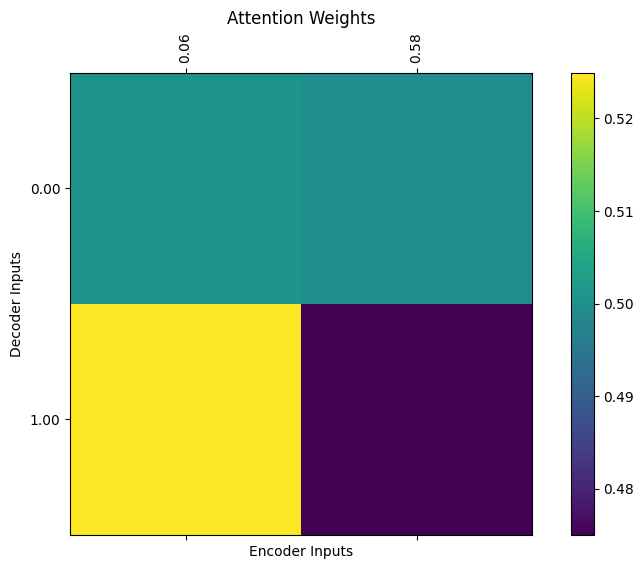

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Функция для инициализации параметров модели
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

# Класс Encoder
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=1):
        super(Encoder, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_dim, hidden_dim, num_layers, batch_first=True)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        out, hidden = self.rnn(x, h0)
        return out, hidden

# Класс Attention Layer
class AttentionLayer(nn.Module):
    def __init__(self, hidden_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(hidden_dim * 2, hidden_dim)
        self.v = nn.Parameter(torch.rand(hidden_dim))

    def forward(self, hidden, encoder_outputs):
        # hidden: [batch_size, hidden_dim]
        # encoder_outputs: [batch_size, seq_len, hidden_dim]

        batch_size = encoder_outputs.size(0)
        seq_len = encoder_outputs.size(1)

        # Расширяем размерность скрытого состояния до [batch_size, seq_len, hidden_dim]
        hidden = hidden.unsqueeze(1).repeat(1, seq_len, 1)

        # Вычисляем энергию
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim=2)))
        energy = energy.permute(0, 2, 1)

        # Вычисляем веса внимания
        v = self.v.repeat(batch_size, 1).unsqueeze(1)
        attention_weights = torch.bmm(v, energy).squeeze(1)
        attention_weights = torch.softmax(attention_weights, dim=1)

        # Вычисляем контекстный вектор
        context_vector = torch.bmm(attention_weights.unsqueeze(1), encoder_outputs).squeeze(1)

        return context_vector, attention_weights

# Класс Decoder с механизмом внимания
class AttnDecoder(nn.Module):
    def __init__(self, output_dim, hidden_dim, attention_layer):
        super(AttnDecoder, self).__init__()
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.attention_layer = attention_layer
        self.rnn = nn.RNN(hidden_dim * 2, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, decoder_input, hidden, encoder_outputs):
        # Вычисляем контекстный вектор и веса внимания
        context_vector, attention_weights = self.attention_layer(hidden.squeeze(0), encoder_outputs)

        # Объединяем входной токен и контекстный вектор
        rnn_input = torch.cat((decoder_input, context_vector), dim=1).unsqueeze(1)

        # Передаем через RNN
        output, hidden = self.rnn(rnn_input, hidden)

        # Объединяем выход RNN и контекстный вектор
        output = torch.cat((output.squeeze(1), context_vector), dim=1)

        # Прогоняем через линейный слой для получения вероятностей
        prediction = self.fc(output)

        return prediction, hidden, attention_weights

# Генерация данных для примера
def generate_data(seq_len, batch_size, input_dim, output_dim):
    X = torch.randn(batch_size, seq_len, input_dim)
    y = torch.randint(0, output_dim, (batch_size, seq_len))
    return X, y

# Визуализация весов внимания
def visualize_attention(attention_weights, encoder_inputs, decoder_inputs):
    fig, ax = plt.subplots(figsize=(10, 6))
    cax = ax.matshow(attention_weights.detach().numpy(), cmap='viridis')
    fig.colorbar(cax)

    ax.set_xticks(range(len(encoder_inputs[0])))
    ax.set_yticks(range(len(decoder_inputs[0])))

    ax.set_xticklabels([f'{i:.2f}' for i in encoder_inputs[0]], rotation=90)
    ax.set_yticklabels([f'{i:.2f}' for i in decoder_inputs[0]])

    plt.xlabel('Encoder Inputs')
    plt.ylabel('Decoder Inputs')
    plt.title('Attention Weights')
    plt.show()

# Основная функция для обучения и тестирования модели
def train_and_test():
    input_dim = 2
    hidden_dim = 3
    output_dim = 2
    seq_len = 2
    batch_size = 1

    # Создание моделей
    encoder = Encoder(input_dim, hidden_dim)
    attention_layer = AttentionLayer(hidden_dim)
    decoder = AttnDecoder(output_dim, hidden_dim, attention_layer)

    # Инициализация весов
    encoder.apply(init_weights)
    decoder.apply(init_weights)

    # Оптимизатор и критерий потерь
    optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    # Генерация данных
    X, y = generate_data(seq_len, batch_size, input_dim, output_dim)

    # Обучение модели
    for epoch in range(100):
        encoder.zero_grad()
        decoder.zero_grad()

        # Получаем скрытые состояния из Encoder
        encoder_outputs, hidden = encoder(X)

        # Инициализируем первый входной токен декодера
        decoder_input = torch.zeros(batch_size, hidden_dim).to(X.device)
        loss = 0

        # Проход по временным шагам декодера
        for t in range(seq_len):
            target = y[:, t]
            output, hidden, attention_weights = decoder(decoder_input, hidden, encoder_outputs)

            loss += criterion(output, target)

            # Используем предсказанный токен как следующий входной токен
            topv, topi = output.topk(1)
            decoder_input = topi.squeeze().float().detach()
            decoder_input = torch.zeros(batch_size, hidden_dim).to(X.device)  # Задаем начальное состояние для следующего шага

        # Обратное распространение и оптимизация
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

    # Тестирование модели и визуализация весов внимания
    with torch.no_grad():
        encoder_outputs, hidden = encoder(X)
        decoder_input = torch.zeros(batch_size, hidden_dim).to(X.device)
        predictions = []
        attention_weights_list = []

        for t in range(seq_len):
            output, hidden, attention_weights = decoder(decoder_input, hidden, encoder_outputs)
            predictions.append(output.argmax(dim=1).item())
            attention_weights_list.append(attention_weights)

            # Используем предсказанный токен как следующий входной токен
            topv, topi = output.topk(1)
            decoder_input = torch.zeros(batch_size, hidden_dim).to(X.device)  # Задаем начальное состояние для следующего шага

        print("Predictions:", predictions)
        visualize_attention(torch.stack(attention_weights_list).squeeze(), X[0], torch.tensor(predictions).unsqueeze(0))

if __name__ == "__main__":
    train_and_test()